In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time


import warnings
warnings.filterwarnings('ignore')


from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [3]:
lfw

{'data': array([[ 85.666664,  81.666664,  53.      , ..., 110.666664, 117.333336,
         181.66667 ],
        [ 48.666668,  56.333332,  87.333336, ..., 234.33333 , 231.66667 ,
         223.      ],
        [ 37.333332,  39.666668,  49.666668, ..., 103.333336,  81.333336,
          59.666668],
        ...,
        [226.      , 220.      , 202.33333 , ..., 148.66667 , 147.66667 ,
         160.66667 ],
        [102.333336, 126.      , 141.66667 , ..., 212.33333 , 217.66667 ,
         162.      ],
        [ 48.333332,  91.333336, 128.33333 , ...,  17.666666,  30.333334,
          28.666666]], dtype=float32),
 'images': array([[[ 85.666664,  81.666664,  53.      , ..., 102.666664,
          102.333336,  93.666664],
         [ 93.      ,  78.      ,  62.666668, ...,  84.      ,
          104.      ,  96.      ],
         [ 94.      ,  71.666664,  97.666664, ...,  71.333336,
           82.333336,  89.666664],
         ...,
         [ 29.666666,  34.      ,  43.333332, ..., 108.333336,
     

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw.data.shape

(1140, 1850)

In [6]:
# 50*37 = 1850
lfw.images.shape

(1140, 50, 37)

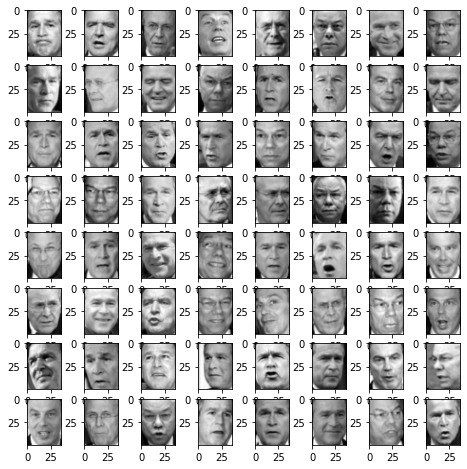

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(lfw.images[i], cmap = plt.cm.gray)
    
plt.show()

In [8]:
x, y = lfw.data , lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pca_lfw = PCA()
pca_lfw.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
#Finding Optimal Number Of Features
k = 0 
total = 0 
while total < 0.99:
    total = total + pca_lfw.explained_variance_ratio_[k]
    k = k + 1
    
k

316

In [10]:
pca_lfw = PCA(n_components=k, whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [11]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape(855,50,37)

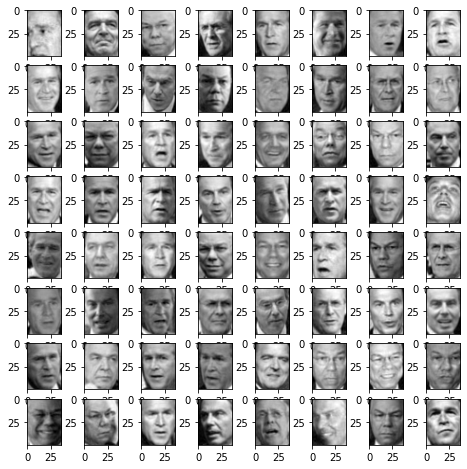

In [12]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.gray)
    
plt.show()

In [13]:
pca_lfw.components_.shape
eigenVec = pca_lfw.components_.reshape(k, 50, 37)

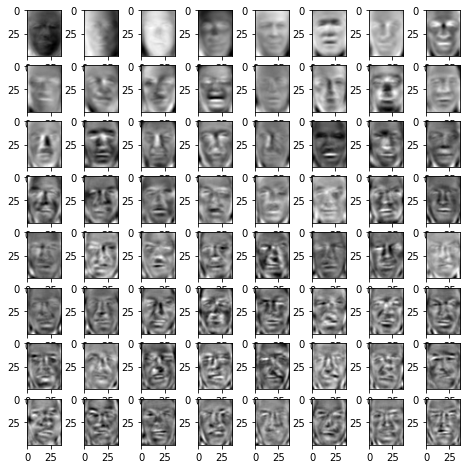

In [14]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenVec[i], cmap = plt.cm.gray)
    
plt.show()

In [15]:
x_train_pca = x_transformed 
x_test_pca = pca_lfw.transform(x_test)

## RANDOM FOREST on non-PCA transformed data

In [16]:

rf = ensemble.RandomForestClassifier()
start =  time.time()
rf.fit(x_train, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test, y_pred))

1.6020078659057617
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        61
           1       0.80      0.22      0.35        36
           2       0.59      0.98      0.73       122
           3       1.00      0.13      0.23        31
           4       0.82      0.26      0.39        35

    accuracy                           0.64       285
   macro avg       0.79      0.46      0.49       285
weighted avg       0.72      0.64      0.59       285

[[ 42   0  19   0   0]
 [  6   8  21   0   1]
 [  2   0 120   0   0]
 [  1   2  23   4   1]
 [  4   0  22   0   9]]


## RANDOM FOREST on PCA transformed data

In [17]:
rf = ensemble.RandomForestClassifier()
start =  time.time()
rf.fit(x_train_pca, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test, y_pred))

0.794816255569458
              precision    recall  f1-score   support

           0       0.74      0.23      0.35        61
           1       1.00      0.06      0.11        36
           2       0.47      1.00      0.64       122
           3       0.00      0.00      0.00        31
           4       1.00      0.06      0.11        35

    accuracy                           0.49       285
   macro avg       0.64      0.27      0.24       285
weighted avg       0.61      0.49      0.37       285

[[ 14   0  47   0   0]
 [  3   2  31   0   0]
 [  0   0 122   0   0]
 [  0   0  31   0   0]
 [  2   0  31   0   2]]
